In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [66]:
aisles = pd.read_csv('aisles.csv')
orders = pd.read_csv('orders.csv')
departments = pd.read_csv('departments.csv')
products = pd.read_csv('products.csv')
order_product_prior = pd.read_csv('order_products__prior.csv')
order_product_train = pd.read_csv('order_products__train.csv')

In [67]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [68]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [69]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [70]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [71]:
order_product_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [72]:
order_product_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [73]:
order_products = order_product_train.append(order_product_prior)
order_products= order_products.merge(orders, on='order_id', how='left')
order_products= order_products.merge(products, on='product_id', how='left')
order_products= order_products.merge(aisles, on='aisle_id', how='left')
order_products= order_products.merge(departments, on='department_id', how='left')
order_products.head()

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_14628\775308217.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_products = order_product_train.append(order_product_prior)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,112108,train,4,4,10,9.0,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,112108,train,4,4,10,9.0,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,112108,train,4,4,10,9.0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,112108,train,4,4,10,9.0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,112108,train,4,4,10,9.0,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods


In [74]:
#The customers with their first orders have the null values for column 'days_since_prior_orders'
order_products.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64

In [75]:
#For segmenting the customer we need to classify the customers based on their buying choices either it could be prefered departments, aisles, or products. However, there are thousands of products, therefore segmentation will based on aisles. So, we will use the crosstab fuction of pandas for user_id and aisles. 
df = pd.crosstab(index=order_products['user_id'], columns=order_products['aisle'], normalize='index')
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Segment
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.028571,3
2,0.000000,0.013274,0.000000,0.0,0.000000,0.0,0.008850,0.000000,0.0,0.0,...,0.004425,0.004425,0.000000,0.000000,0.000000,0.0,0.008850,0.0,0.185841,4
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.011364,0.000000,0.000000,0.000000,0.000000,0.0,0.022727,0.0,0.000000,4
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.055556,0.000000,0.000000,0.0,0.055556,0.0,0.000000,3
5,0.021739,0.086957,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.065217,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206205,0.000000,0.000000,0.019608,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.176471,4
206206,0.000000,0.014035,0.000000,0.0,0.000000,0.0,0.014035,0.003509,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.003509,0.0,0.003509,0.0,0.000000,3
206207,0.000000,0.000000,0.000000,0.0,0.004484,0.0,0.000000,0.000000,0.0,0.0,...,0.017937,0.000000,0.008969,0.004484,0.000000,0.0,0.049327,0.0,0.067265,3


In [76]:
df.shape

(206209, 134)

# KMEANS WITH PCA

In [121]:
#As the df has 134 columns, therefore to reduce the dimentionality, Principal component analysis (PCA) will be performed on df and the number of dimensions will be selected based on maximum variability covered by the features. 
pca= PCA()
pca.fit(df)
pca_variance_ratio=pca.explained_variance_ratio_

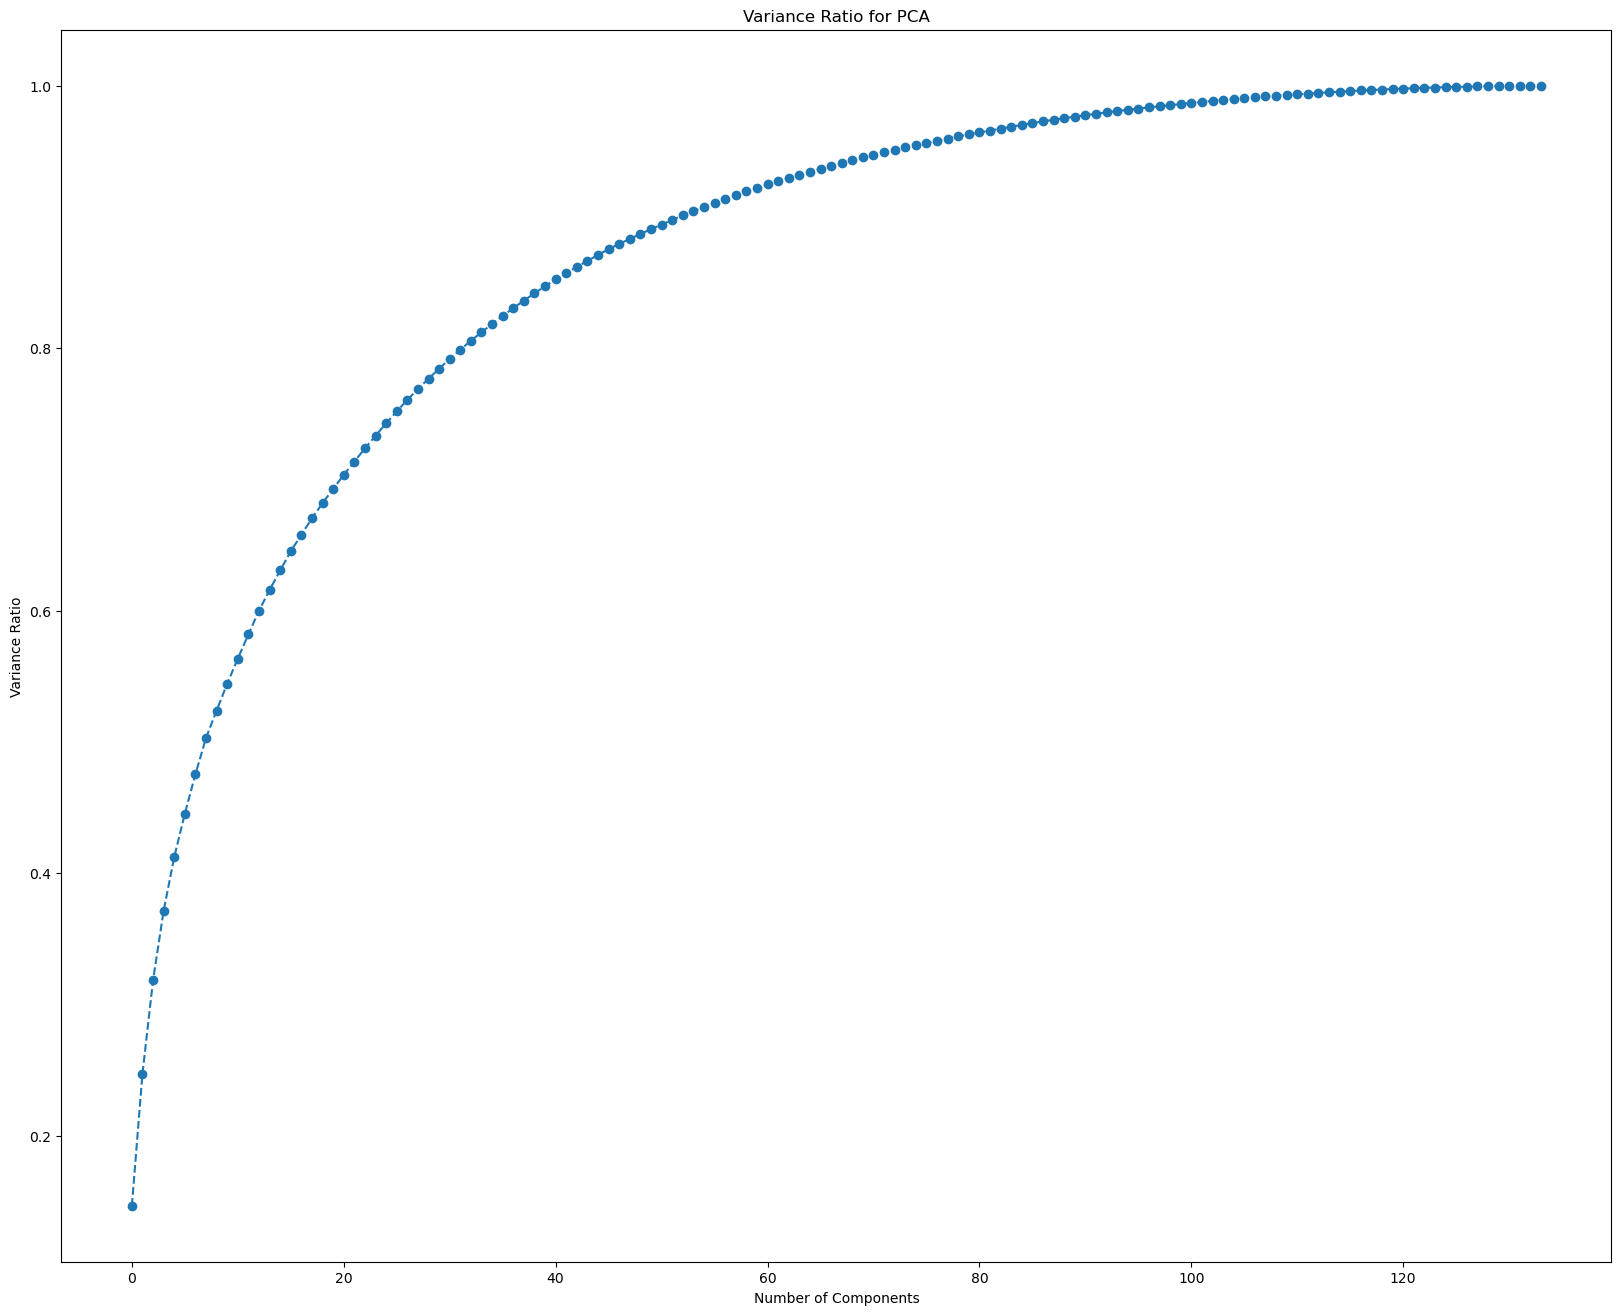

In [80]:
plt.figure(figsize=(20,16))
plt.plot(range(len(df.columns)),pca_variance_ratio.cumsum(), marker='o', linestyle='--' )
plt.xlabel('Number of Components')
plt.ylabel('Variance Ratio')
plt.title('Variance Ratio for PCA')
plt.savefig('Variance Ratio for PCA')
plt.show()

In [81]:
#as 75% of the variance is covered by the 15 components so pca will be performed on 15 components.
pca=PCA(n_components=15)
pca_scores = pca.fit_transform(df)
pca_scores

array([[-0.12238162,  0.02861339, -0.04784788, ..., -0.05421558,
         0.04998533,  0.04977353],
       [-0.03442095,  0.11161567, -0.06413072, ...,  0.06555649,
         0.0170417 , -0.00253089],
       [ 0.06325622,  0.10411297,  0.00049266, ..., -0.02907832,
         0.09071902,  0.00964533],
       ...,
       [-0.02482725, -0.01351953, -0.00396868, ..., -0.00479087,
         0.01354196,  0.01782698],
       [-0.00930963, -0.00337485, -0.04559438, ..., -0.00068012,
         0.00335221,  0.02520073],
       [-0.06675465,  0.04404045, -0.04967491, ..., -0.02224657,
         0.0366325 ,  0.00578691]])

In [82]:
# now the pca components will be transformed to dataframe to apply kmeans.
pca_df= pd.DataFrame(pca_scores)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.122382,0.028613,-0.047848,0.012824,-0.075156,-0.112166,-0.100602,0.087863,-0.063892,-0.003391,-0.016913,0.000841,-0.054216,0.049985,0.049774
1,-0.034421,0.111616,-0.064131,-0.109475,0.073247,-0.029550,-0.049135,-0.058625,-0.009896,-0.018477,0.004755,-0.035288,0.065556,0.017042,-0.002531
2,0.063256,0.104113,0.000493,-0.014146,-0.047774,0.111067,-0.031793,0.012950,0.012454,0.005225,-0.010414,0.091367,-0.029078,0.090719,0.009645
3,-0.094301,0.052753,0.001045,-0.005095,-0.071522,-0.017637,-0.024888,-0.038948,0.010859,-0.012866,-0.059841,-0.069075,0.119962,0.030874,-0.038910
4,0.089432,-0.031068,-0.022805,-0.011802,0.042316,0.111360,-0.015768,0.100952,0.025330,-0.036506,0.031233,-0.014041,-0.003207,-0.004207,0.003261


# KMEANS

In [83]:
# for finding the optimal number of clusters kmeans will be initiated from 1 to 15.
wcss=[]
for i in range(1,16):
    kmeans_pca=KMeans(n_clusters=i, init='k-means++')
    kmeans_pca.fit(pca_df)
    wcss.append(kmeans_pca.inertia_)

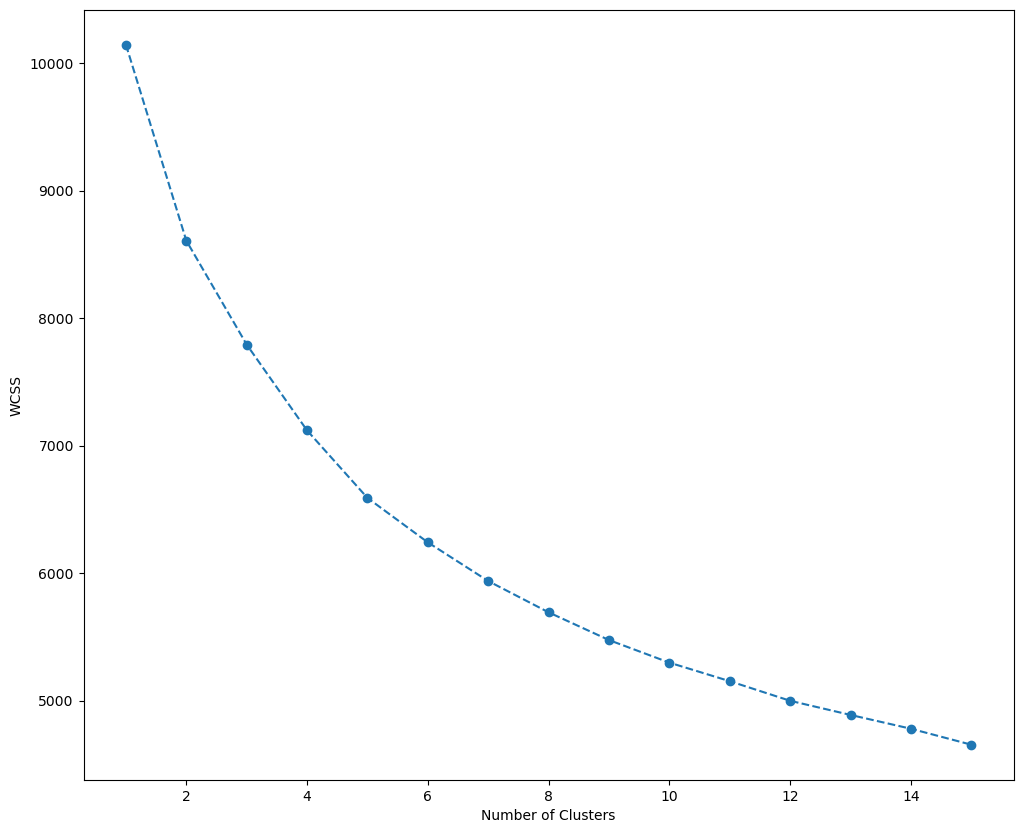

In [84]:
# from elbow method, we will select the optimal number of clusters as 5.
plt.figure(figsize=(12,10))
plt.plot(range(1,16), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [97]:
#now kmeans is applied on pca components with n_clusters = 5 and predict function of kmeans creates the dependent variable by predicting the label of each data point from 0-4. 
kmeans_pca = KMeans(n_clusters=5, init='k-means++')
kmeans_pca = kmeans_pca.fit(pca_df)
kmeans_labels = kmeans_pca.predict(pca_df)

In [98]:
#for visualizing the segments of customers, 2 of the pca components (PCA1, PCA2) will be used as columns. Another columns of 'Segment' is added which shows their corresponding segments.
temp_df = pca_df.iloc[:,:2]
temp_df.columns = ['PCA1', 'PCA2']
temp_df['Segment'] = kmeans_labels
temp_df.head(20)

C:\Users\MUH0351\AppData\Local\Temp\ipykernel_14628\3014414185.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Segment'] = kmeans_labels


,PCA1,PCA2,Segment
0,-0.122382,0.028613,1
1,-0.034421,0.111616,3
2,0.063256,0.104113,3
3,-0.094301,0.052753,1
4,0.089432,-0.031068,2
5,0.118432,-0.204297,2
6,-0.001364,0.023278,1
7,0.230400,-0.258210,2
8,-0.111921,0.022710,1
9,0.094309,-0.076628,2


In [100]:
temp_df['Segment'].unique()

array([1, 3, 2, 0, 4])

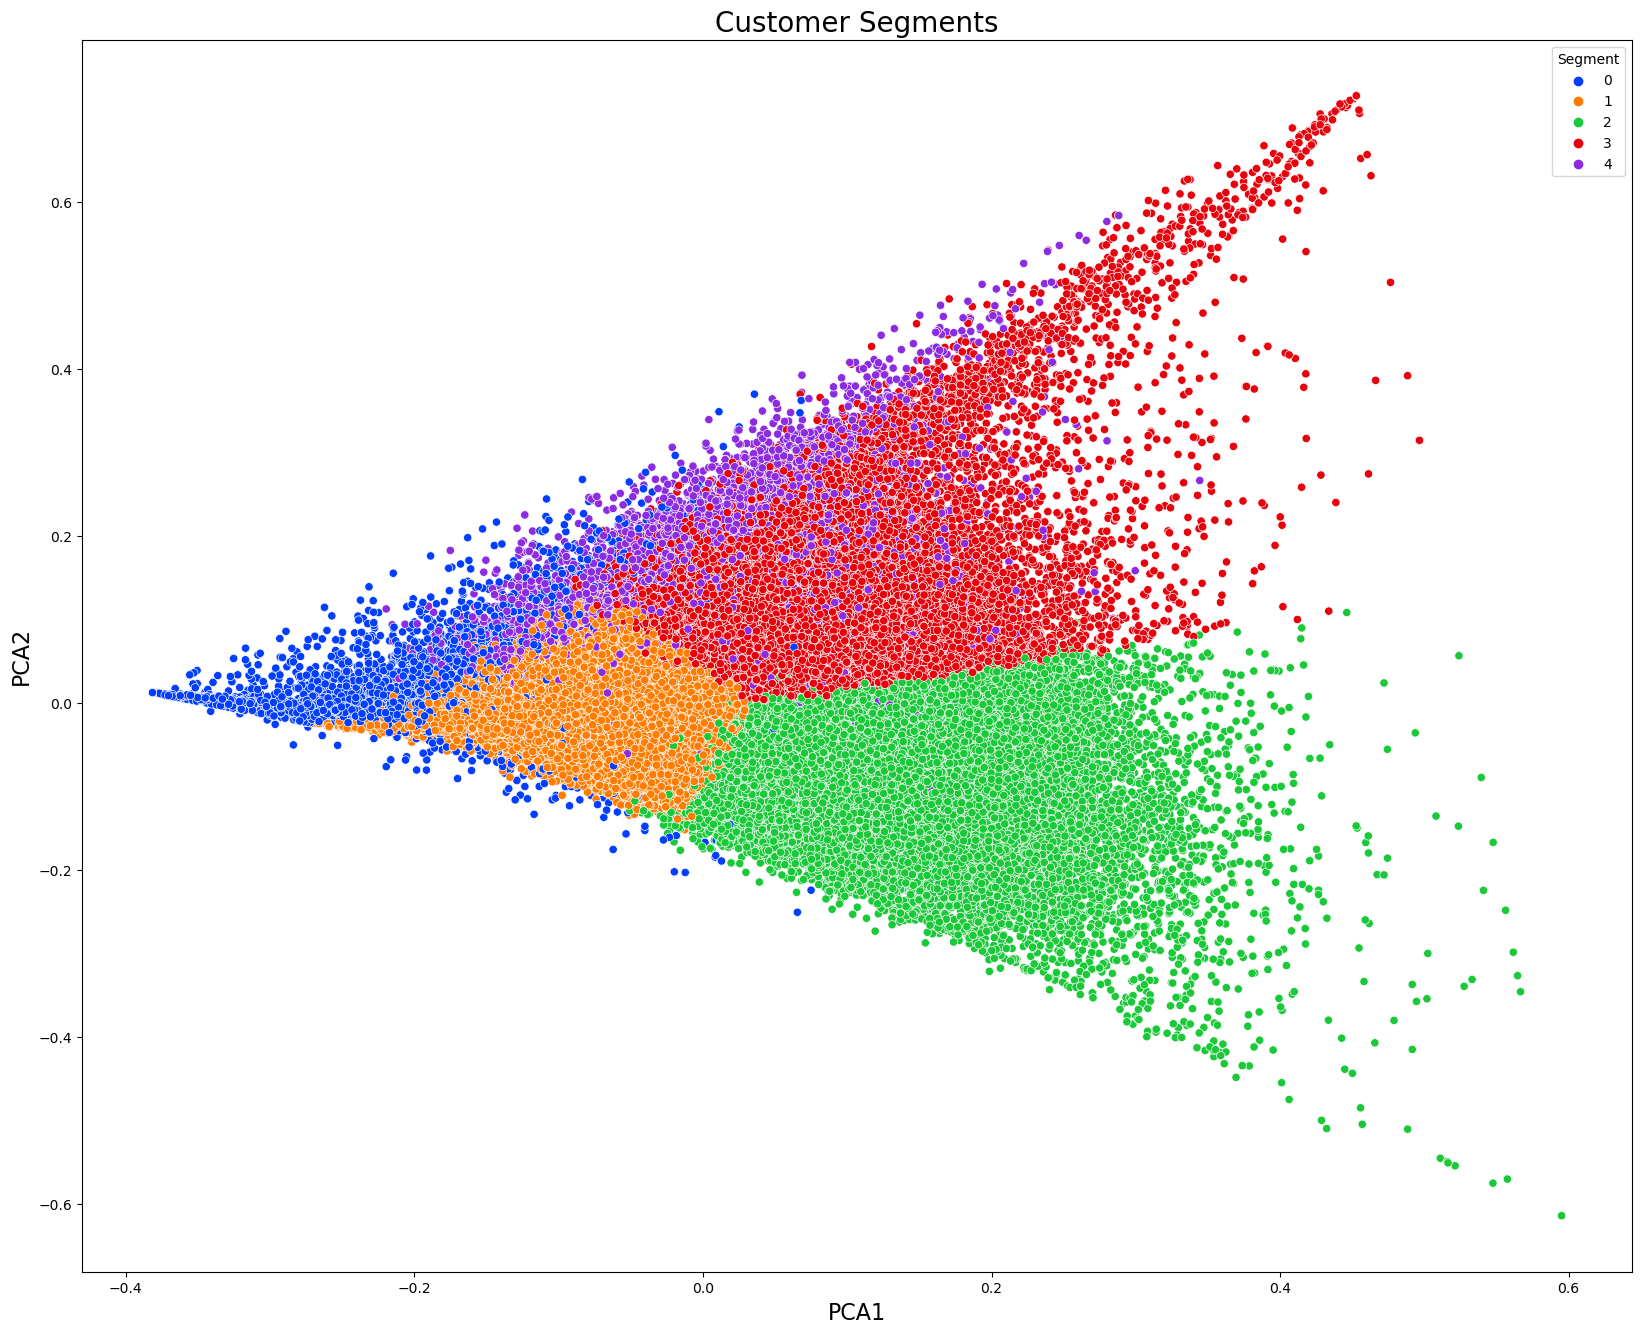

In [101]:
#plotting segments
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.scatterplot(data=temp_df, x='PCA1', y='PCA2', hue='Segment', palette='bright')
ax.set_xlabel('PCA1', size=16)
ax.set_ylabel('PCA2', size=16)
ax.set_title('Customer Segments', size=20)
plt.show()

# Findings & Analysis

In [102]:
#add column of Segment to the dataframe we used at the start.
df['Segment']=labels
df.head()

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt,Segment
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.028571,3
2,0.000000,0.013274,0.0,0.0,0.0,0.0,0.00885,0.0,0.0,0.0,...,0.004425,0.004425,0.000000,0.0,0.0,0.0,0.008850,0.0,0.185841,4
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.011364,0.000000,0.000000,0.0,0.0,0.0,0.022727,0.0,0.000000,4
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.055556,0.0,0.0,0.0,0.055556,0.0,0.000000,3
5,0.021739,0.086957,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.065217,2


In [43]:
# assign variable name to each of the segment and take the mean of the values of each of the segment, which results in analysing buying preferece of the customers in that particular segment.
Segment_1 =df[df['Segment']==0]
Segment_2 =df[df['Segment']==1]
Segment_3 =df[df['Segment']==2]
Segment_4 =df[df['Segment']==3]
Segment_5 =df[df['Segment']==4]

In [127]:
Segment_1.shape

(5439, 135)

In [44]:
Segment_1.drop('Segment', axis=1).mean().sort_values(ascending=False)[0:10]

aisle
water seltzer sparkling water    0.382020
soft drinks                      0.053489
fresh fruits                     0.042159
packaged vegetables fruits       0.019252
yogurt                           0.017887
paper goods                      0.017258
chips pretzels                   0.017002
milk                             0.016039
packaged produce                 0.015584
fresh vegetables                 0.014831
dtype: float64

In [128]:
Segment_2.shape

(98233, 135)

In [45]:
Segment_2.drop('Segment', axis=1).mean().sort_values(ascending=False)[0:10]

aisle
packaged produce                 0.287863
fresh fruits                     0.149931
packaged vegetables fruits       0.061727
fresh vegetables                 0.043842
water seltzer sparkling water    0.026421
milk                             0.022437
packaged cheese                  0.022389
frozen produce                   0.017462
oils vinegars                    0.017012
chips pretzels                   0.015641
dtype: float64

In [129]:
Segment_3.shape

(55696, 135)

In [46]:
Segment_3.drop('Segment', axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh vegetables                 0.217551
fresh fruits                     0.112130
packaged vegetables fruits       0.066832
yogurt                           0.031321
packaged cheese                  0.026826
fresh herbs                      0.022830
milk                             0.020556
soy lactosefree                  0.020412
frozen produce                   0.018307
water seltzer sparkling water    0.017553
dtype: float64

In [131]:
Segment_4.shape

(38762, 135)

In [47]:
Segment_4.drop('Segment', axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.053168
fresh vegetables                 0.042421
yogurt                           0.040821
packaged vegetables fruits       0.036149
packaged cheese                  0.030957
chips pretzels                   0.029921
milk                             0.028442
water seltzer sparkling water    0.027064
soft drinks                      0.024094
ice cream ice                    0.024008
dtype: float64

In [132]:
Segment_5.shape

(8079, 135)

In [48]:
Segment_5.drop('Segment', axis=1).mean().sort_values(ascending=False)[0:10]

aisle
fresh fruits                     0.224335
fresh vegetables                 0.076837
packaged vegetables fruits       0.071050
yogurt                           0.049244
milk                             0.031809
packaged cheese                  0.025776
soy lactosefree                  0.021903
water seltzer sparkling water    0.021853
frozen produce                   0.018096
bread                            0.017390
dtype: float64

* Segment 1 belongs to the 5439 customers with a strong preference towards water seltzer sparkling water.  
* Segment 2 is the largest segment of 98233 customers with a strong preference towards packaged produce and fresh fruits.  
* Segment 3 belongs to the 55696 customers with a strong preference towards fresh fruits and fresh vegetables.  
* Segment 4 belongs to the 38762 customers who does not have any prominent preference. This group might belong to the new customers.  
* Segment 5 belongs to the 8079 customers who mostly buy fresh fruits only.